# Annotation mapping

In this example, we show how to use {func}`moscot.problems.space.annotation_mapping`.

:::{seealso}
- See {doc}`200_cell_transitions` on how to compute and plot cell transitions.
:::

## Imports and data loading

In [1]:
import warnings

from numba.core.errors import NumbaDeprecationWarning
from tqdm import TqdmWarning

warnings.simplefilter("ignore", category=NumbaDeprecationWarning)
warnings.filterwarnings("ignore", category=TqdmWarning)
warnings.simplefilter("ignore", UserWarning)

import moscot as mt
from moscot import datasets
from moscot.problems.space import MappingProblem

import numpy as np

import seaborn as sns

import scanpy as sc

NameError: name 'NumbaDeprecationWarning' is not defined

Load the {func}`~moscot.datasets.drosophila` dataset.

In [ ]:
adata_sc = datasets.drosophila(spatial=False)
adata_sp = datasets.drosophila(spatial=True)
adata_sc, adata_sp

(AnnData object with n_obs × n_vars = 1297 × 2000
     obs: 'n_counts'
     var: 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'hvg', 'log1p', 'pca'
     obsm: 'X_pca'
     varm: 'PCs'
     layers: 'counts',
 AnnData object with n_obs × n_vars = 3039 × 82
     obs: 'n_counts'
     var: 'n_counts'
     uns: 'log1p', 'pca'
     obsm: 'X_pca', 'spatial'
     varm: 'PCs'
     layers: 'counts')

## Cluster the data

In [ ]:
sc.pp.neighbors(adata_sc)
sc.pp.neighbors(adata_sp)

c:\Users\adwol\anaconda3\envs\moscot_dev\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\adwol\anaconda3\envs\moscot_dev\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\adwol\anaconda3\envs\moscot_dev\Lib\site-packages\umap\distances.py:108

In [ ]:
sc.tl.umap(adata_sc)
sc.tl.umap(adata_sp)

In [ ]:
sc.tl.leiden(adata_sc)  # low resolution
sc.tl.leiden(adata_sp)

In [ ]:
adata_sc.obs.leiden = adata_sc.obs.leiden.astype("category")
adata_sp.obs.leiden = adata_sp.obs.leiden.astype("category")

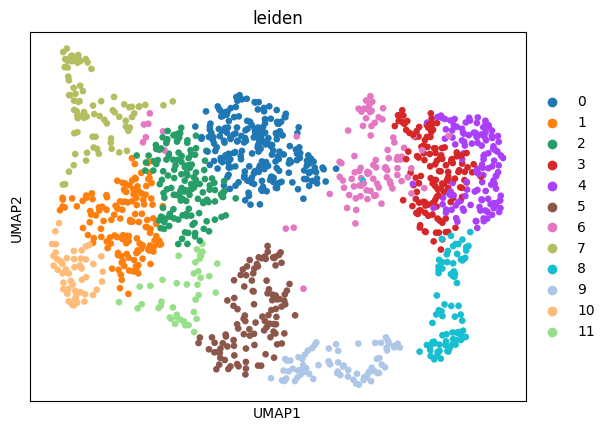

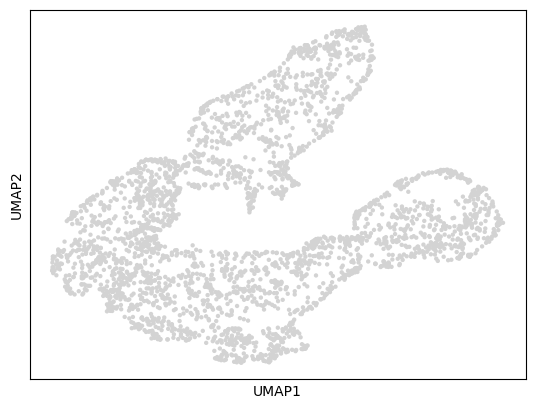

In [ ]:
sc.pl.umap(adata_sc, color="leiden")
sc.pl.umap(adata_sp)

## Prepare and solve the problem

In [ ]:
mp = MappingProblem(adata_sc=adata_sc, adata_sp=adata_sp)

In [ ]:
mp = mp.prepare(
    sc_attr={"attr": "obsm", "key": "X_pca"}, kwargs={"callback_kwargs": "local_pca"}
)

INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Normalizing spatial coordinates of `x`.                                                                   


In [ ]:
mp = mp.solve()

INFO     Solving `1` problems                                                                                      
INFO     Solving problem OTProblem[stage='prepared', shape=(3039, 1297)].                                          


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [ ]:
anno_map = mp.annotation_mapping("max", "leiden", "leiden")  # add as obs in _sp

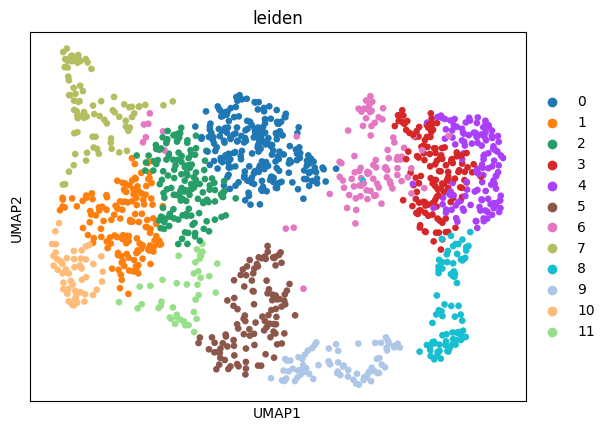

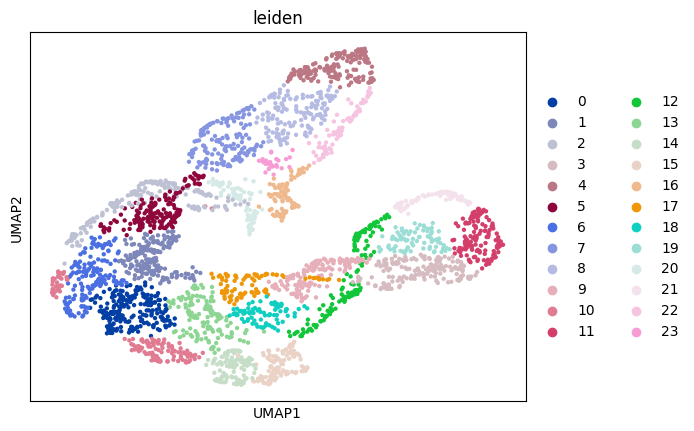

In [ ]:
sc.pl.umap(adata_sc, color="leiden")
sc.pl.umap(adata_sp, color="leiden")